# EIA API Exploration

This notebook explores the Energy Information Administration (EIA) API for electricity generation data.

## Learning Objectives
- Understand EIA API structure and endpoints
- Explore electricity generation data by fuel type
- Analyze patterns in California's electricity generation
- Prepare data for ML pipeline integration

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import requests
import json

# Import GridSource package components
# Note: Install package first with: pip install -e .
from gridsource.research.data_helpers import APIExplorer, analyze_energy_patterns

# Set up plotting
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("✅ Libraries imported successfully")

## 1. API Setup

First, let's set up our API explorer. You can either:
1. Use your own EIA API key (get one free at: https://www.eia.gov/opendata/register.php)
2. Use sample data for exploration

In [18]:
# Option 1: Use your own API key
# Uncomment and add your API key:
# API_KEYS = {
#     'eia_api_key': 'YOUR_EIA_API_KEY_HERE'
# }

# Option 2: Use sample data (no API key required)
API_KEYS = {'eia_api_key': 'UJdxUIbNW9X97L7rqWKeJnackrlgvIUZeqRylLt7'}

# Initialize the explorer
explorer = APIExplorer(API_KEYS)
print("🔧 API Explorer initialized")

🔧 API Explorer initialized


## 2. Basic EIA Data Exploration

Let's start by exploring the EIA electricity generation data for California.

In [19]:
# Fetch EIA data for the last 14 days
eia_data = explorer.explore_eia_api(days=14, detailed=True)

# Display basic information
print(f"\n📊 EIA Data Summary:")
print(f"Shape: {eia_data.shape}")
print(f"\nColumns: {list(eia_data.columns)}")
print(f"\nData types:")
print(eia_data.dtypes)

🔍 Exploring EIA Electricity API (last 14 days)...
❌ Error fetching EIA data: 504 Server Error: Gateway Timeout for url: https://api.eia.gov/v2/electricity/rto/daily-region-data/data/?api_key=UJdxUIbNW9X97L7rqWKeJnackrlgvIUZeqRylLt7&frequency=daily&data%5B0%5D=value&facets%5Brespondent%5D%5B%5D=CAL&facets%5Bfueltype%5D%5B%5D=NG&facets%5Bfueltype%5D%5B%5D=SUN&facets%5Bfueltype%5D%5B%5D=WAT&facets%5Bfueltype%5D%5B%5D=WND&start=2025-05-11&end=2025-05-25&sort%5B0%5D%5Bcolumn%5D=period&sort%5B0%5D%5Bdirection%5D=desc&length=1000

📊 EIA Data Summary:
Shape: (60, 4)

Columns: ['date', 'fuel_type', 'generation_mwh', 'respondent']

Data types:
date              datetime64[ns]
fuel_type                 object
generation_mwh           float64
respondent                object
dtype: object


In [20]:
# Show first few rows
print("🔍 First 10 rows of EIA data:")
eia_data.head(10)

🔍 First 10 rows of EIA data:


,date,fuel_type,generation_mwh,respondent
0,2025-05-11 00:16:47.415921,NG,30325.540779,CAL
1,2025-05-11 00:16:47.415921,SUN,18748.126309,CAL
2,2025-05-11 00:16:47.415921,WAT,16088.411688,CAL
3,2025-05-11 00:16:47.415921,WND,11498.764204,CAL
4,2025-05-12 00:16:47.415921,NG,33824.521052,CAL
5,2025-05-12 00:16:47.415921,SUN,21702.775272,CAL
6,2025-05-12 00:16:47.415921,WAT,16362.481502,CAL
7,2025-05-12 00:16:47.415921,WND,10735.561360,CAL
8,2025-05-13 00:16:47.415921,NG,30290.809874,CAL
9,2025-05-13 00:16:47.415921,SUN,19882.402658,CAL


## 3. Data Quality Analysis

Let's examine the quality and completeness of our EIA data.

In [8]:
# Check for missing values
print("🔍 Missing Values Analysis:")
missing_data = eia_data.isnull().sum()
print(missing_data)

# Check data completeness by fuel type
print("\n📊 Records by Fuel Type:")
fuel_counts = eia_data['fuel_type'].value_counts()
print(fuel_counts)

# Check date range coverage
print("\n📅 Date Coverage:")
print(f"Start date: {eia_data['date'].min()}")
print(f"End date: {eia_data['date'].max()}")
print(f"Number of unique dates: {eia_data['date'].nunique()}")

🔍 Missing Values Analysis:
date              0
fuel_type         0
generation_mwh    0
respondent        0
dtype: int64

📊 Records by Fuel Type:
fuel_type
NG     15
SUN    15
WAT    15
WND    15
Name: count, dtype: int64

📅 Date Coverage:
Start date: 2025-05-11 00:05:27.941783
End date: 2025-05-25 00:05:27.941783
Number of unique dates: 15


## 4. Electricity Generation Analysis

Now let's analyze the electricity generation patterns by fuel type.

In [9]:
# Create summary statistics
print("📈 Generation Statistics by Fuel Type:")
generation_stats = eia_data.groupby('fuel_type')['generation_mwh'].agg([
    'count', 'mean', 'std', 'min', 'max', 'sum'
]).round(2)

generation_stats

📈 Generation Statistics by Fuel Type:


,count,mean,std,min,max,sum
fuel_type,,,,,,
NG,15,31227.82,2756.94,26808.71,37372.12,468417.25
SUN,15,19696.72,1523.12,16801.71,22185.71,295450.83
WAT,15,16050.52,1529.02,13417.37,18911.77,240757.85
WND,15,10477.33,569.30,9220.80,11192.82,157159.97


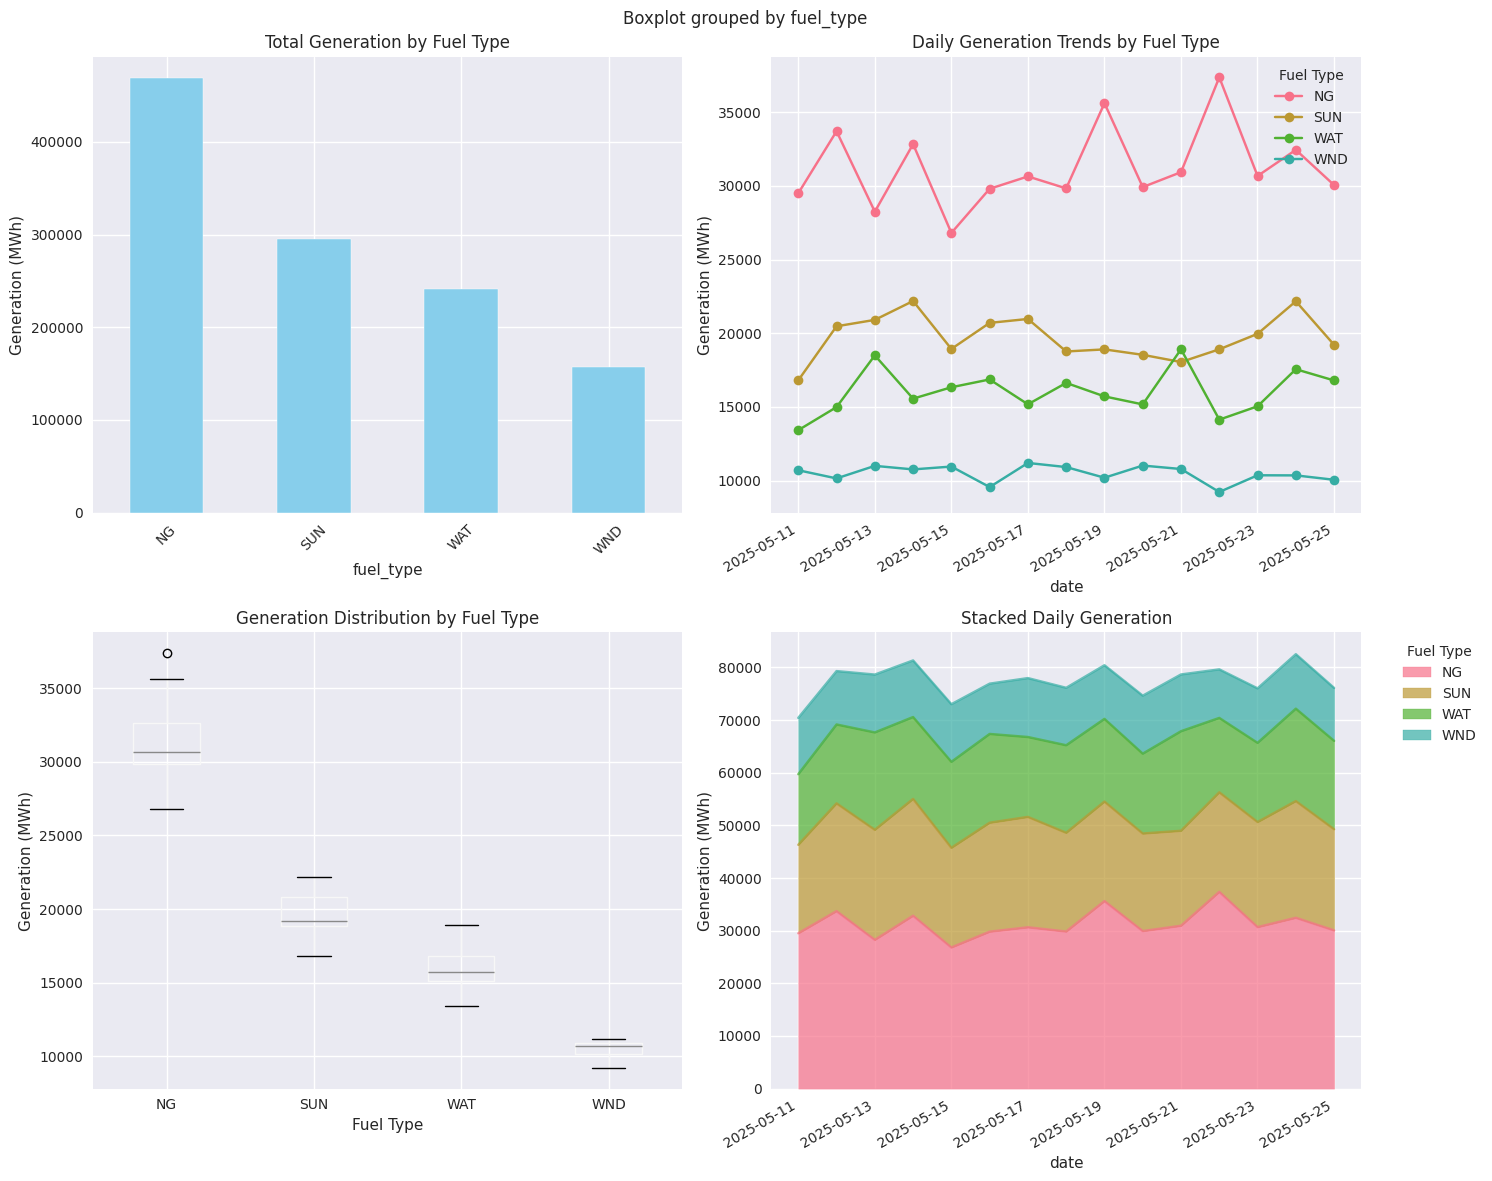

In [10]:
# Visualize generation by fuel type
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('California Electricity Generation Analysis', fontsize=16)

# 1. Total generation by fuel type (bar chart)
fuel_totals = eia_data.groupby('fuel_type')['generation_mwh'].sum().sort_values(ascending=False)
fuel_totals.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Total Generation by Fuel Type')
axes[0,0].set_ylabel('Generation (MWh)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Daily generation trends (line chart)
daily_generation = eia_data.groupby(['date', 'fuel_type'])['generation_mwh'].sum().unstack(fill_value=0)
daily_generation.plot(ax=axes[0,1], marker='o')
axes[0,1].set_title('Daily Generation Trends by Fuel Type')
axes[0,1].set_ylabel('Generation (MWh)')
axes[0,1].legend(title='Fuel Type')

# 3. Generation distribution (box plot)
eia_data.boxplot(column='generation_mwh', by='fuel_type', ax=axes[1,0])
axes[1,0].set_title('Generation Distribution by Fuel Type')
axes[1,0].set_xlabel('Fuel Type')
axes[1,0].set_ylabel('Generation (MWh)')

# 4. Stacked area chart of daily totals
daily_generation.plot(kind='area', stacked=True, ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Stacked Daily Generation')
axes[1,1].set_ylabel('Generation (MWh)')
axes[1,1].legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 5. Renewable vs Non-Renewable Analysis

Let's categorize fuel types and analyze renewable vs non-renewable generation.

🌱 Renewable Energy Analysis:
Average renewable percentage: 59.7%
Renewable percentage range: 53.1% - 64.1%


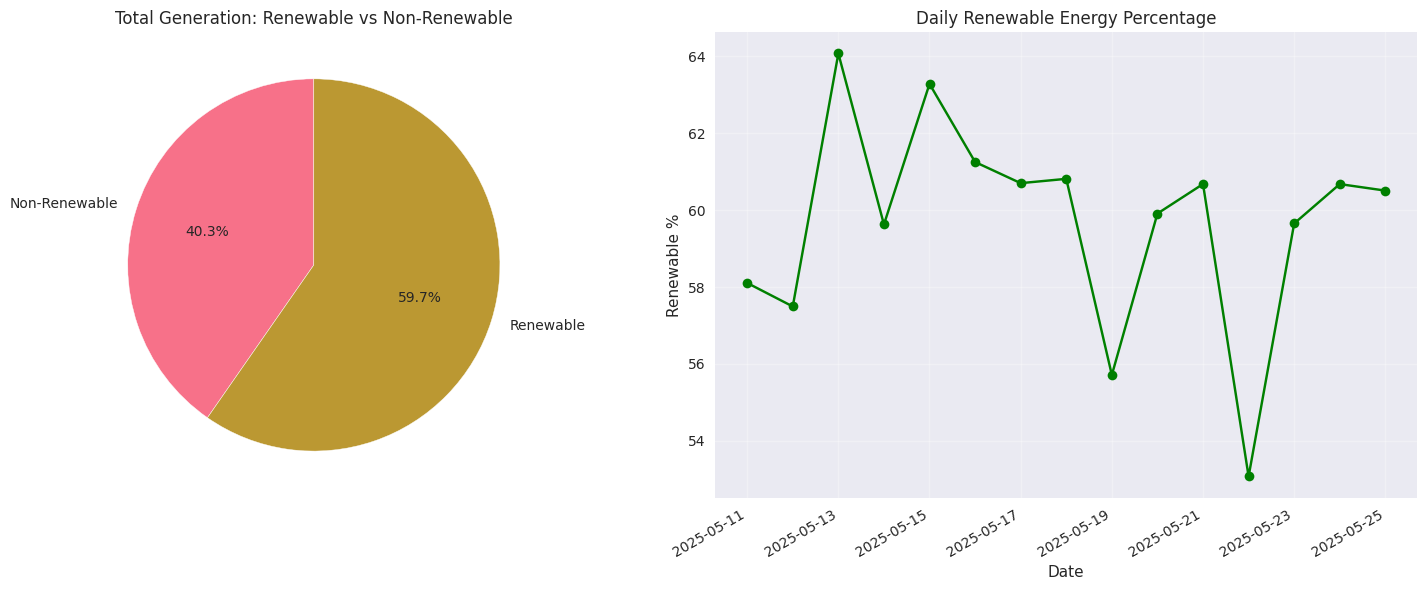

In [11]:
# Define renewable vs non-renewable fuel types
renewable_fuels = ['SUN', 'WND', 'WAT']  # Solar, Wind, Hydro
non_renewable_fuels = ['NG']  # Natural Gas

# Add renewable category
eia_data['renewable'] = eia_data['fuel_type'].apply(
    lambda x: 'Renewable' if x in renewable_fuels else 'Non-Renewable'
)

# Calculate renewable percentage
renewable_analysis = eia_data.groupby(['date', 'renewable'])['generation_mwh'].sum().unstack(fill_value=0)
renewable_analysis['total'] = renewable_analysis.sum(axis=1)
renewable_analysis['renewable_pct'] = (renewable_analysis['Renewable'] / renewable_analysis['total']) * 100

print("🌱 Renewable Energy Analysis:")
print(f"Average renewable percentage: {renewable_analysis['renewable_pct'].mean():.1f}%")
print(f"Renewable percentage range: {renewable_analysis['renewable_pct'].min():.1f}% - {renewable_analysis['renewable_pct'].max():.1f}%")

# Visualize renewable vs non-renewable
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart of total generation
total_by_category = eia_data.groupby('renewable')['generation_mwh'].sum()
total_by_category.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Total Generation: Renewable vs Non-Renewable')
axes[0].set_ylabel('')

# Daily renewable percentage trend
renewable_analysis['renewable_pct'].plot(ax=axes[1], marker='o', color='green')
axes[1].set_title('Daily Renewable Energy Percentage')
axes[1].set_ylabel('Renewable %')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Time Series Patterns

Let's examine time-based patterns in electricity generation.

📅 Generation Patterns by Day of Week:
fuel_type         NG      SUN      WAT      WND
day_of_week                                    
Monday       34665.0  19687.0  15347.0  10166.0
Tuesday      29087.0  19720.0  16832.0  11005.0
Wednesday    31885.0  20115.0  17235.0  10768.0
Thursday     32090.0  18920.0  15232.0  10084.0
Friday       30240.0  20330.0  15950.0   9955.0
Saturday     31546.0  21568.0  16364.0  10771.0
Sunday       29797.0  18257.0  15612.0  10553.0


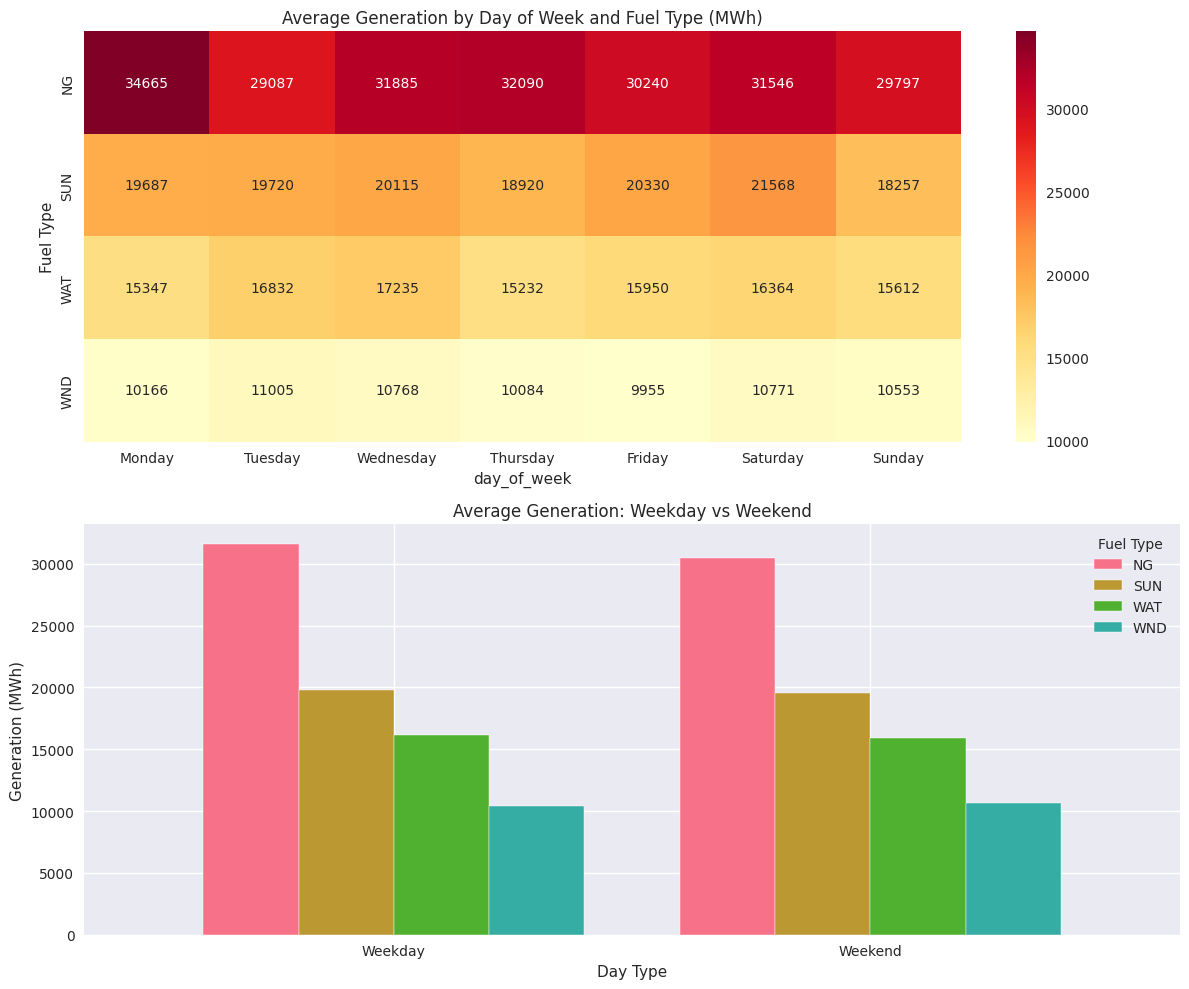

In [12]:
# Add time-based features
eia_data['day_of_week'] = eia_data['date'].dt.day_name()
eia_data['is_weekend'] = eia_data['date'].dt.weekday >= 5

# Analyze patterns by day of week
print("📅 Generation Patterns by Day of Week:")
daily_patterns = eia_data.groupby(['day_of_week', 'fuel_type'])['generation_mwh'].mean().unstack(fill_value=0)

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_patterns = daily_patterns.reindex(day_order)

print(daily_patterns.round(0))

# Visualize weekly patterns
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Heatmap of generation by day and fuel type
sns.heatmap(daily_patterns.T, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Average Generation by Day of Week and Fuel Type (MWh)')
axes[0].set_ylabel('Fuel Type')

# Weekend vs weekday comparison
weekend_comparison = eia_data.groupby(['is_weekend', 'fuel_type'])['generation_mwh'].mean().unstack(fill_value=0)
weekend_comparison.index = ['Weekday', 'Weekend']
weekend_comparison.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Average Generation: Weekday vs Weekend')
axes[1].set_ylabel('Generation (MWh)')
axes[1].set_xlabel('Day Type')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Fuel Type')

plt.tight_layout()
plt.show()

## 7. Data Preparation for ML Pipeline

Let's prepare the EIA data in the format needed for our ML pipeline.

In [13]:
# Aggregate daily generation for ML features
ml_features = eia_data.groupby('date').agg({
    'generation_mwh': 'sum'  # Total daily generation
}).reset_index()

# Add individual fuel type generation as separate features
fuel_pivot = eia_data.pivot_table(
    index='date', 
    columns='fuel_type', 
    values='generation_mwh', 
    aggfunc='sum',
    fill_value=0
).reset_index()

# Rename columns with fuel_ prefix
fuel_columns = {col: f'generation_{col.lower()}_mwh' for col in fuel_pivot.columns if col != 'date'}
fuel_pivot = fuel_pivot.rename(columns=fuel_columns)

# Merge with main features
ml_features = ml_features.merge(fuel_pivot, on='date', how='left')

# Add renewable percentage
ml_features = ml_features.merge(
    renewable_analysis[['renewable_pct']].reset_index(), 
    on='date', 
    how='left'
)

# Rename columns for clarity
ml_features = ml_features.rename(columns={
    'generation_mwh': 'total_generation_mwh',
    'renewable_pct': 'renewable_percentage'
})

print("🔧 ML Features Dataset:")
print(f"Shape: {ml_features.shape}")
print(f"Columns: {list(ml_features.columns)}")
print("\nFirst 5 rows:")
ml_features.head()

🔧 ML Features Dataset:
Shape: (15, 7)
Columns: ['date', 'total_generation_mwh', 'generation_ng_mwh', 'generation_sun_mwh', 'generation_wat_mwh', 'generation_wnd_mwh', 'renewable_percentage']

First 5 rows:


,date,total_generation_mwh,generation_ng_mwh,generation_sun_mwh,generation_wat_mwh,generation_wnd_mwh,renewable_percentage
0,2025-05-11 00:05:27.941783,70418.649012,29501.762411,16801.709558,13417.373694,10697.803350,58.105185
1,2025-05-12 00:05:27.941783,79310.172764,33712.164597,20471.400471,14983.703917,10142.903779,57.493265
2,2025-05-13 00:05:27.941783,78650.208591,28253.296073,20905.670239,18496.072906,10995.169373,64.077278
3,2025-05-14 00:05:27.941783,81335.055250,32836.501417,22185.705114,15558.091383,10754.757336,59.628107
4,2025-05-15 00:05:27.941783,73020.272634,26808.713451,18932.436603,16331.548385,10947.574196,63.285931


In [21]:
# Statistical summary of ML features
print("📊 ML Features Statistical Summary:")
ml_features.describe().round(2)

📊 ML Features Statistical Summary:


,date,total_generation_mwh,generation_ng_mwh,generation_sun_mwh,generation_wat_mwh,generation_wnd_mwh,renewable_percentage
count,15,15.00,15.00,15.00,15.00,15.00,15.00
mean,2025-05-18 00:05:27.941783296,77452.39,31227.82,19696.72,16050.52,10477.33,59.70
min,2025-05-11 00:05:27.941783,70418.65,26808.71,16801.71,13417.37,9220.80,53.07
25%,2025-05-14 12:05:27.941783040,76067.25,29819.13,18831.77,15103.29,10166.42,58.87
50%,2025-05-18 00:05:27.941783040,77978.33,30643.48,19208.05,15710.78,10697.80,60.51
75%,2025-05-21 12:05:27.941783040,79471.94,32642.41,20803.79,16826.85,10930.13,60.76
max,2025-05-25 00:05:27.941783,82520.05,37372.12,22185.71,18911.77,11192.82,64.08
std,NaN,3205.67,2756.94,1523.12,1529.02,569.30,2.76


## 8. Data Quality Checks

Let's perform some final data quality checks for our ML pipeline.

In [22]:
# Check for data quality issues
print("🔍 Data Quality Assessment:")

# Missing values
missing_values = ml_features.isnull().sum()
print(f"\n❌ Missing values:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(ml_features)*100:.1f}%)")
    else:
        print(f"  {col}: ✅ No missing values")

# Negative values (shouldn't exist for generation)
numeric_cols = ml_features.select_dtypes(include=[np.number]).columns
print(f"\n🔢 Negative values check:")
for col in numeric_cols:
    negative_count = (ml_features[col] < 0).sum()
    if negative_count > 0:
        print(f"  {col}: ❌ {negative_count} negative values")
    else:
        print(f"  {col}: ✅ No negative values")

# Outliers (using IQR method)
print(f"\n📊 Outlier detection (IQR method):")
for col in numeric_cols:
    Q1 = ml_features[col].quantile(0.25)
    Q3 = ml_features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((ml_features[col] < lower_bound) | (ml_features[col] > upper_bound)).sum()
    print(f"  {col}: {outliers} outliers ({outliers/len(ml_features)*100:.1f}%)")

🔍 Data Quality Assessment:

❌ Missing values:
  date: ✅ No missing values
  total_generation_mwh: ✅ No missing values
  generation_ng_mwh: ✅ No missing values
  generation_sun_mwh: ✅ No missing values
  generation_wat_mwh: ✅ No missing values
  generation_wnd_mwh: ✅ No missing values
  renewable_percentage: ✅ No missing values

🔢 Negative values check:
  total_generation_mwh: ✅ No negative values
  generation_ng_mwh: ✅ No negative values
  generation_sun_mwh: ✅ No negative values
  generation_wat_mwh: ✅ No negative values
  generation_wnd_mwh: ✅ No negative values
  renewable_percentage: ✅ No negative values

📊 Outlier detection (IQR method):
  total_generation_mwh: 1 outliers (6.7%)
  generation_ng_mwh: 1 outliers (6.7%)
  generation_sun_mwh: 0 outliers (0.0%)
  generation_wat_mwh: 0 outliers (0.0%)
  generation_wnd_mwh: 0 outliers (0.0%)
  renewable_percentage: 3 outliers (20.0%)


## 9. Save Processed Data

Finally, let's save our processed EIA data for use in other notebooks and the ML pipeline.

In [25]:
# Save raw EIA data
eia_data.to_csv('eia_raw_data.csv', index=False)
print(f"✅ Saved raw EIA data: {len(eia_data)} records")

# Save ML features
ml_features.to_csv('eia_ml_features.csv', index=False)
print(f"✅ Saved ML features: {len(ml_features)} records")

# Save summary statistics
summary_stats = {
    'total_records': len(eia_data),
    'date_range': f"{eia_data['date'].min()} to {eia_data['date'].max()}",
    'fuel_types': eia_data['fuel_type'].unique().tolist(),
    'total_generation_mwh': eia_data['generation_mwh'].sum(),
    'avg_daily_generation_mwh': ml_features['total_generation_mwh'].mean(),
    'avg_renewable_pct': ml_features['renewable_percentage'].mean()
}

with open('eia_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)
print(f"✅ Saved summary statistics")

print("\n🎉 EIA API exploration complete!")
print(f"📁 Files saved to: {output_dir}")

✅ Saved raw EIA data: 60 records
✅ Saved ML features: 15 records
✅ Saved summary statistics

🎉 EIA API exploration complete!
📁 Files saved to: ../research_output


## Summary

In this notebook, we:

1. **✅ Explored the EIA API** structure and data format
2. **✅ Analyzed electricity generation** patterns by fuel type
3. **✅ Examined renewable vs non-renewable** energy trends
4. **✅ Identified time-based patterns** (weekday vs weekend)
5. **✅ Prepared data for ML pipeline** with proper feature engineering
6. **✅ Performed data quality checks** for missing values and outliers
7. **✅ Saved processed data** for future use

## Key Insights

- **Natural Gas (NG)** is the dominant fuel source for electricity generation
- **Solar (SUN)** shows significant daily variation
- **Renewable percentage** varies day-to-day based on weather conditions
- **Weekend patterns** may differ from weekday electricity demand

## Next Steps

1. Explore weather data to understand solar/wind generation patterns
2. Analyze economic indicators that might affect energy demand
3. Combine all data sources for comprehensive ML feature engineering
4. Build and test liquidity forecasting models